# Introduction

This is a python notebook made to explain the concept of neural networks and how you can code one yourself while using Mr Andrej Karpathy's amazing (<a href="https://www.youtube.com/watch?v=VMj-3S1tku0">video</a>) as reference for all the code.

<p style="color: red">NOTE: THIS NOTEBOOK IS <b>NOT</b> MEANT TO REPLACE WATCHING THE <a href="https://www.youtube.com/watch?v=VMj-3S1tku0">VIDEO</a>. ITS MEANT TO BE USED AS A GUIDE ALONGSIDE THE VIDEO AND FOR REVISION PURPOSES. 

# What is a Neural Network ?
To put it in simple terms, neural networks are mathematical expressions that take data as inputs (along with their corresponding weights and bias).  
This data is then send through multiple 'layers' with each layer containing multiple 'neurons'. The network learns by adjusting the weights and biases of each neuron in order to <b>minimize the loss</b>. The lower the loss, the higher the accuracy of the model. 

## What is a Neuron ?
It is the basic building block of a neural network. It takes in the following inputs: 

- Weights: This represents the importance level of the corresponding input. (how important a given feature is)
- Bias: Addition of bias term helps in adjusting neuron's output.
- Activation Function: This function helps to supress the output value within a specific range. It determines the neuron's outputs based on its inputs

## Building the Value object
As we talked about in the prev paragraph, a Neuron takes in multiple values as input. Each value has some mathematical operation performed on it. This includes addition, multiplication etc.

Below is a very diagram which helps in visualizing the concept of Neuron and Value. 

<img src="./images/simple_neuron.png" width="600px"/>

## Neural Network Structure
So we saw what a Neuron is and what a Value object is. 
Now lets talk a bit about what the overall structure of a neural network is. A simple neural network consists of 3 types of layers:  
1. Input Layer: The number of neurons in this layer is based on the number of features/inputs from initial data 
2. Hidden Layer(s): These are one or more layers of neurons that process the information from the input layer. 
3. Output Layer: This layer produces the final results. Usually the number of (output) neurons in this layer depends on the problem beeing solved. Example, if we are training the neural network to classify 3 different types of dogs and so each output neuron will contain a probability of the input belonging to one of the three classes/types. 

We will now move on to talking about the different processes within a neural network starting with the forward pass.

### Forward Pass
The forward pass (also called the forward propagation) processes information in the following order:
1. Each neuron receives inputs
2. The neuron computes the weighted sum of the inputs. The equation to carry out the computation is : $$z = \sum_{i=1}^n (w_i \cdot x_i) + b$$
where $ x_i $ is the input 'i' to the neuron and $ w_i $ is the weight of the corresponding neuron  
3. After computing $ z $ we add a bias value to it and pass it through an activation function. To learn more about activation functions you can visit the following resources: 
    - <a href="https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0"> Link 1 </a>
    - <a href="https://www.datacamp.com/tutorial/introduction-to-activation-functions-in-neural-networks"> Link 2 </a>
    - <a href="https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6"> Link 3 </a>

4. The output from step 3 is then passed onto the next neuron as that neuron's input and the process then keeps following step 2 and step 3 until the output/final layer which produces the prediction.

To give a further understanding lets take a look at a simple binary classification example which uses a neural network. 

<!-- insert neural network image with forward prop -->

### Loss Calculation
The next step would be to calculate the loss of the current neural network. 'Loss' refers to the difference between actual value (ground truth value) and the predicted value. 
This is an extremely crucial step as our main goal is to <b>minimize the loss</b> in order to achieve the best reuslts. 
The loss function we choose depends on the problem we are trying to model our neural network on.  
For instance, if we have a regression problem we can use Cross-Entropy Loss. To understand which loss functions are use for which problems, check out this <a href="https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/">link</a>

### Loss Gradient Calculaton
Before looking at loss gradient, lets take a look at what 'gradient' is. Gradient can be thought of as the measure of how much a value changes when its corresponding input changes. A 'loss gradient' measures how the loss changes when we change the values of parameters (primarily weights). In neural networks we are concerned with obtaining the loss gradient with respect to the weights and biases.  
By understanding how the loss behaves with changes to the weights and biases, you can adjust the weights and biases accordingly to minimize the loss.  
To obtain the loss gradient we go through a process known as <b>backpropagation</b>

### Backpropagation
To summarize backpropagation, its basically the neural network learning from its mistakes.  
The way backpropagation works is by obtaining the value of loss gradient with respect to all the parameters in the neural network (by parameters, I am referring to all the weights and biases in the model). We then adjust the values of the parameters according to the loss gradient wrt each of them. The reason its called 'back'propagation is because we start from the final/output layer and move through the hidden layer/s to the input layer. 

#### Mathematical Side of Backprop (tbh its literally all calculus)
<p style="color: red">Before proceeding with this part I would advise you to refresh yourself on the concepts of linear algebra and calculus. For those new to these concepts I would highly advise you to check out the <a href="https://www.khanacademy.org/math/calculus-1">khan academy</a> course and the <a href="https://www.3blue1brown.com/topics/calculus">3Blue1Brown</a> course to learn these concepts before moving further into this section</p>

The entire process of backpropagation relies heavily on the calculus concept of chain rule. Here I will just write down the chain rule so that you can refer to it when going through the rest of the notebook.  
For example, to calculate the loss gradient wrt weight 1 (w1) (To give you a better idea on how this works there is an accompanying neural network visualization for this example (generated thanks to claude 3.5) ):   

<img src="./images/single_derivation.png" width="600px"/>  

$$\frac{\partial \mathcal{L}}{\partial w_1} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}$$  

where: 
- w1 is the weight 1 (from x1 to z)
- z is the weighted sum $$z = (w_1 \cdot x_1) + (w_2 \cdot x_2) + b$$
- a is the activation value $$a = \sigma(z) $$  (in this case sigmoid is the activation function)
- L is the loss function


NOTE: I will be working on a bigger example which will cover both forward prop and backprop full flow (meaning calculations for every parameter in the model)

## Coding out micrograd

micrograd is the implementation of the backpropagation step in neural networks. However as discussed earlier, to get to the backprop we need to start by implementing all the concepts that lead up to that point. The order we will follow is : 
- Creating the Value class
- Creting the Neuron class
- Creating the Layer class
- Creating the MLP class

### Value class
As defined wayyyyy earlier (kindly scroll up to check it out), a value object is basically value on which operations such as additon, subtraction etc are carried out. 
You will also notice the _backward() function in each of the operation classes. This function plays a key part in the backprop process. For each operation:   
1. Addition: Distributing the gradient to both inputs  

2. Multiplication: Here we update the gradients for both inputs based on the chain rule   

3. Activation function: Each activation function has its own derivative (obviously). In the case of micrograd we use the tanh activation function and the _backward() function returns the derivative accordingly  
$$\frac{d}{dx} \tanh(x) = 1 - \tanh^2(x)$$  
4. Power operation: Computes gradient for power op according to the rule: $$\frac{d}{dx} x^n = nx^{n-1} $$

<p style="color: red">Do not skip any parts of the video especially not the main coding parts. Here I am giving brief overview of each of the classes but its implementation is best explained in the video</p>

In [1]:
import math


# creating the Value object and enabling functions such as addition and subtraction
class Value:
    def __init__(self, data, _children=(), _op="", label="") -> None:
        """
        data: value of the neuron (activation value)
        _children: set. used to store the children of the node
        label: neuron reference name
        _op: operation performed to produce the Value.
        label: label on the Value object
        """
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        # keeping track of derivative of the node
        self.grad = 0
        # store chain rule. by default does nothing
        self._backward = lambda: None

    def __repr__(self) -> str:
        """
        print the value stored within the Value object
        """
        return f"Value(data={self.data})"

    def __add__(self, other) -> int | float:
        # if we are trying to add integer to a Value object, convert the number into a Value object then extract its value and add
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
            # here we accumulate gradient as it is possible we may have multivariable contribution backwards. depositing gradients from mutliple branches
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other

    def __mul__(self, other) -> int | float:
        """
        other: usually this is the weight
        """
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    # this is basically a fallback for if the __mul__ function does not get the inputs in the other self, other. to learn more about it try this link : https://stackoverflow.com/questions/5181320/under-what-circumstances-are-rmul-called

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):
        # self * 1/other = self/other
        return self * other**-1

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        # subtraction implementation
        return self + (-other)

    def __pow__(self, other):
        # power function.
        assert isinstance(
            other, (int, float)
        ), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f"**{other}")

        def _backward():
            # multiplying out.grad is essnetial to the chain rule
            new_val = other - 1
            self.grad += other * (self.data**new_val) * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        """
        This is the main activation function used
        """
        x = self.data
        t = (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))
        out = Value(t, (self,), "tanh")

        def _backward():
            # derivative of the tanh func. starting from loss L
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        """
        Exponent
        """
        x = self.data
        out = Value(math.exp(x), (self,), "exp")

        def _backward():
            self.grad += out.data * out.grad

        out._backward = _backward

        return out

    def backward(self):
        """
        Extremely important function that helps us traverse through each node in reverse order starting from the final layer.
        """
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

### Neuron Class
This is a straightforward implementation of neuron where we initialize each Neuron with a list of weights (its length matching the number of input neurons from previous layer) and a bias value

We use the equation $$z = \sigma(\sum_{i=1}^n (w_i \cdot x_i) + b)$$ to calculate the activation value of the Neuron

In [2]:
# neuron class
import random


class Neuron:
    # neuron class within which we will define incoming inputs/weights as well as its bias

    def __init__(self, nin):
        """
        nin: Number of inputs. Equivalent to number of neurons in input/previous layer
        """
        # initializing collection of weights -> number of inputs/inital neurons
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # calls the equation to calculate activation value: (w * x) + b
        # if you are unfamilar with zip() check this out: https://www.geeksforgeeks.org/zip-in-python/
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        # apply activation function for non-linearity + suppress value within a specified range
        out = act.tanh()
        return out

    def parameters(self):
        """
        returns the weight list and the bias value for the neuron
        """
        return self.w + [self.b]

### Layer Class


Each layer contains multiple neurons. Here we are writing a layer class which initializes with a list of Neurons.

In [3]:
class Layer:
    # a layer contains multiple Neuron objects
    def __init__(self, nin, nout):
        """
        nin:  number of incoming neurons/weights for one Neuron in layer
        nout: number of outputs/how many neurons do you want in the layer
        """
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        """
        initialize the neurons within the layer and calculate their activation values
        """
        outs = [n(x) for n in self.neurons]
        return outs

    def parameters(self):
        """
        List of all the parameters (weights + biases) within the layer
        """
        params = []
        for neuron in self.neurons:
            for p in neuron.parameters():
                params.append(p)
        return params

### MLP class
This is the class where we use all the classes we have written up till now to build a Multi-Layer Perceptron. 

In [4]:
class MLP:
    # define number of layers and number of neurons in each layer

    def __init__(self, nin, nouts):
        """
        nin:   number of inputs
        nouts: list of layer sizes / number of neurons in each layer
        """
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
        # print("YESSSSS")

    def __call__(self, x):
        """
        Initialize all layers
        """
        for layer in self.layers:
            x = layer(x)
        return x[0] if len(x) == 1 else x

    def parameters(self):
        """
        return all parameters within the neural network
        """
        params = []
        for layer in self.layers:
            for neuron_param in layer.parameters():
                params.append(neuron_param)

        return params

    def no_params(self):
        """
        Number of parameters within the neural network
        """
        return len(self.parameters())

# A Complete Neural Network Example Walkthrough

In this section I will walk you through a complete mathematical step by step of how a neural network's different steps look like. We will start by defining a problem that we will then model using neural networks. 

Example: We need to predict the sales of two flavors of ice cream (chocolate and vanilla) based on two inputs/features/factors (Temperature and Time of Day). 

## Modelling the Neural Network 

We will start off by modelling the neural network for this problem as shown below  

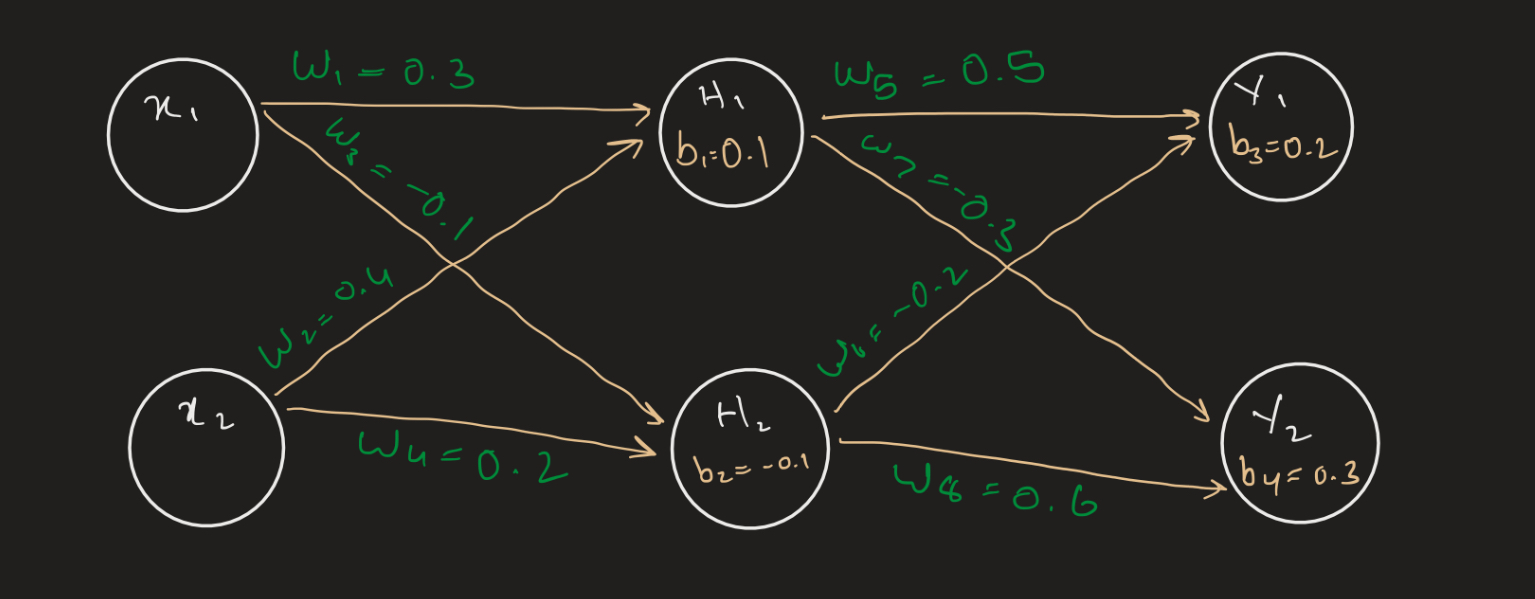

A few things to note here: 
- X1 and X2 represent the features Temperature and Time of Day.
- H1 and H2 are nuerons in the hidden layer. The number of hidden layers and the number of neurons within each is up to you. In this case I chose to keep it simple with just one layer and 2 neurons within it. 
- Y1 and Y2 represent the outputs which in this case are the flavors chocolate and vanilla. 

## Forward Propagation 

The following is the forward propagation for this neural network.  
The general equation is z = act(wx + b)

<img src="./images/forward_prop.jpg" width="1200px"/>  

## Loss Calculation 

This section will be based on calculating the loss. The loss function we are using is Mean Squared Error. 

Here we assume some true values for Y1 and Y2 and use them for MSE. 

<img src="./images/loss_calc.jpg" width="900px"/>  

## Backpropagation 

The following is the entire backpropagation calculation. A reminder that this entire process calculation has been done for just <b> 1 </b> iteration (in reality it would depend on number of epochs defined by the user)

<p align="center">
  <img src="./images/backprop_1.jpg" width="600px"/>
  <img src="./images/backprop_2.jpg" width="500px"/>
  <img src="./images/backprop_3.jpg" width="500px"/>
</p>

## Updating weights and biases

Before we start updating weights and biases lets recap on what exactly the term dL/dw represents. The term dL/dw represents <b> the direction and rate at which the loss value moves given a change in the weight (w).</b> For example, if dL/dw value is 0.40, this means increasing the weight will lead to an increase in the loss value (and vice versa). Now recall what objective we are trying to achieve by updating weights and biases : DECREASE LOSS TO A MINIMUM.

So each weight and bias's update will require its partial derivates wrt loss. 
The eq we will use to update the weights/biases is : 

w1_new = w1_old - learning_rate*(dL/dw1)

Woah !. What is that learning_rate variable here ? The learning rate controls how quickly to update the weights. It determines how quickly the model's loss converges towards the minimum loss. 

Now lets do the actual calculation. Here given the amount of repitition I decided to just type it out instead of writing by hand (since there is not much in terms of derivation here)

#### lr value (set by the user)
learning_rate = 0.1

#### updating weights
w1_new = w1 - learning_rate * dL/dw1  
w2_new = w2 - learning_rate * dL/dw2  
w3_new = w3 - learning_rate * dL/dw3  
w4_new = w4 - learning_rate * dL/dw4  
w5_new = w5 - learning_rate * dL/dw5  
w6_new = w6 - learning_rate * dL/dw6  
w7_new = w7 - learning_rate * dL/dw7  
w8_new = w8 - learning_rate * dL/dw8  

#### updating biases
b1_new = b1 - learning_rate * dL_db1  
b2_new = b2 - learning_rate * dL_db2  
b3_new = b3 - learning_rate * dL_db3  
b4_new = b4 - learning_rate * dL_db4  

#### calculation of weigths and biases (if you do not understand how dL/dw was calculated please refer to the previous section again)
w1_new = 0.3 - 0.1 * (-0.0014) ≈ 0.3001  
w2_new = 0.4 - 0.1 * (-0.0022) ≈ 0.4002  
w3_new = -0.1 - 0.1 * 0.0006 ≈ -0.1001  
w4_new = 0.2 - 0.1 * 0.0010 ≈ 0.1999  
w5_new = 0.5 - 0.1 * (-0.0148) ≈ 0.5015  
w6_new = -0.2 - 0.1 * (-0.0117) ≈ -0.1988  
w7_new = -0.3 - 0.1 * 0.0002 ≈ -0.3000  
w8_new = 0.6 - 0.1 * 0.0002 ≈ 0.6000  

b1_new = 0.1 - 0.1 * (-0.0027) ≈ 0.1003  
b2_new = -0.1 - 0.1 * 0.0012 ≈ -0.1001  
b3_new = 0.2 - 0.1 * (-0.0232) ≈ 0.2023  
b4_new = 0.3 - 0.1 * 0.0003 ≈ 0.3000  
